In [1]:
# !pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD


Load and preprocess the CIFAR-10 dataset

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 300s 2us/step


In [4]:
y_train = y_train.reshape(-1,) #convert to 1D array
y_test = y_test.reshape(-1,)

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to the range [0, 1]

Define the network architecture

In [6]:
ffnn = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the 32x32x3 input images
    Dense(256, activation='relu'),    # First hidden layer with ReLU activation
    Dense(128, activation='relu'),    # Second hidden layer with ReLU activation
    Dense(10, activation='softmax')    # Output layer with softmax activation for classification
])
ffnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
fitted = ffnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 19s 11ms/step - loss: 1.8692 - accuracy: 0.3278 - val_loss: 1.7585 - val_accuracy: 0.3735
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6905 - accuracy: 0.3992 - val_loss: 1.7164 - val_accuracy: 0.3736
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6157 - accuracy: 0.4274 - val_loss: 1.6173 - val_accuracy: 0.4348
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5584 - accuracy: 0.4453 - val_loss: 1.5910 - val_accuracy: 0.4367
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5123 - accuracy: 0.4626 - val_loss: 1.5885 - val_accuracy: 0.4341
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4778 - accuracy: 0.4742 - val_loss: 1.5783 - val_accuracy: 0.4284
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4448 - accuracy: 0.4882 - val_loss: 1.4721 - va

Evaluate the network

In [8]:
test_loss, test_acc = ffnn.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 [==============================] - 2s 6ms/step - loss: 1.4418 - accuracy: 0.4844
Test accuracy: 48.44%


Plot the training loss and accuracy

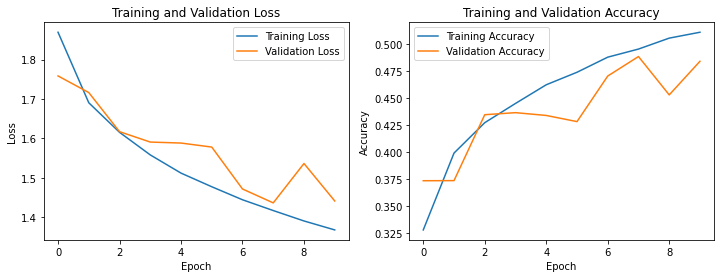

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fitted.history['loss'], label='Training Loss')
plt.plot(fitted.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(fitted.history['accuracy'], label='Training Accuracy')
plt.plot(fitted.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()